In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import json
import folium

from sklearn import preprocessing 

import squarify

In [2]:
# !apt_get install -y fonts-nanum > /dev/null
# !fc-cache -fv > /dev/nanum
# !rm -rf ~/.cache/matplotlib > /dev/null

mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [3]:
df1_KT = pd.read_csv('방문객_KT/20230510121505_방문자수 히트맵.csv', encoding='cp949')
df2_KT = pd.read_csv('방문객_KT/20230510121505_광역별 방문자 수.csv', encoding='cp949')
df3_KT = pd.read_csv('방문객_KT/20230510121505_방문자 수 추이.csv', encoding='cp949')

df1_SKT = pd.read_csv('방문객_SKT/20230508105058_방문자수 히트맵.csv', encoding='cp949')
df2_SKT = pd.read_csv('방문객_SKT/20230508105058_광역별 방문자 수.csv', encoding='cp949')
df3_SKT = pd.read_csv('방문객_SKT/20230508105058_방문자 수 추이.csv', encoding='cp949')

In [4]:
df_time  = pd.read_excel('연도별통계(1975-2022).xlsx')
df_time.head(10)

,월별 방한 외래관광객 (1975-2022),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"Visitor Arrivals by Month, 1975-2022",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,연 도,계,성장률,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
4,Year,Total(명),Change(%),Jan.,Feb.,Mar.,Apr.,May,Jun.,Jul.,Aug.,Sep.,Oct.,Nov.,Dec.
5,1975,632846,22.3,35494,37979,48733,50090,54741,56824,54439,60901,62188,68959,61335,41163
6,1976,834239,31.823382,53132,54190,67721,72636,75719,70727,69515,78207,77460,90774,74705,49453
7,1977,949666,13.836203,63052,66138,78442,88615,83151,78977,72650,85528,89828,99762,84919,58604
8,1978,1079396,13.660592,71812,74218,88620,93260,97457,93537,84141,95242,103099,115515,95860,66635
9,1979,1126100,4.326864,81236,81422,94674,103420,107847,102237,92006,106788,108925,106092,78319,63134


In [5]:
df1_KT.head()

,광역지자체,방문자 수
0,서울특별시,1.077432e+10
1,부산광역시,3.147915e+09
2,대구광역시,2.566051e+09
3,인천광역시,2.854629e+09
4,광주광역시,1.598878e+09


In [6]:
df1_SKT.head()

,광역지자체,방문자 수
0,서울특별시,936164502.0
1,부산광역시,279435540.0
2,대구광역시,176335480.0
3,인천광역시,345334237.0
4,광주광역시,107483150.0


# KT, SKT 데이터프레임 합치기

In [7]:
df1_all = pd.concat([df1_KT, df1_SKT], axis=1)
df1_all.head()

,광역지자체,방문자 수,광역지자체,방문자 수
0,서울특별시,1.077432e+10,서울특별시,936164502.0
1,부산광역시,3.147915e+09,부산광역시,279435540.0
2,대구광역시,2.566051e+09,대구광역시,176335480.0
3,인천광역시,2.854629e+09,인천광역시,345334237.0
4,광주광역시,1.598878e+09,광주광역시,107483150.0


In [8]:
df1_all.iloc[:,1:2].head()

,방문자 수
0,1.077432e+10
1,3.147915e+09
2,2.566051e+09
3,2.854629e+09
4,1.598878e+09


In [9]:
df1_all.iloc[:,3:4].head()

,방문자 수
0,936164502.0
1,279435540.0
2,176335480.0
3,345334237.0
4,107483150.0


In [10]:
df1_all['모든방문자수'] = df1_all.iloc[:,1:2] + df1_all.iloc[:,3:4]
df1_all.head()

,광역지자체,방문자 수,광역지자체,방문자 수,모든방문자수
0,서울특별시,1.077432e+10,서울특별시,936164502.0,1.171049e+10
1,부산광역시,3.147915e+09,부산광역시,279435540.0,3.427350e+09
2,대구광역시,2.566051e+09,대구광역시,176335480.0,2.742386e+09
3,인천광역시,2.854629e+09,인천광역시,345334237.0,3.199963e+09
4,광주광역시,1.598878e+09,광주광역시,107483150.0,1.706361e+09


In [11]:
df2_KT

,광역지자체명,기초지자체명,광역지자체 방문자 수,광역지자체 방문자 비율,기초지자체 방문자 수,기초지자체 방문자 비율
0,강원도,춘천시,3.015669e+09,3.6,487171589.0,16.2
1,강원도,원주시,3.015669e+09,3.6,528889778.0,17.5
2,강원도,강릉시,3.015669e+09,3.6,447200533.0,14.8
3,강원도,동해시,3.015669e+09,3.6,162347163.0,5.4
4,강원도,태백시,3.015669e+09,3.6,86282413.0,2.9
...,...,...,...,...,...,...
245,충청북도,증평군,2.595677e+09,3.1,69344337.0,2.7
246,충청북도,진천군,2.595677e+09,3.1,132093867.0,5.1
247,충청북도,괴산군,2.595677e+09,3.1,73701030.0,2.8
248,충청북도,음성군,2.595677e+09,3.1,179493504.0,6.9


In [12]:
df2_SKT

,광역지자체명,기초지자체명,광역지자체 방문자 수,광역지자체 방문자 비율,기초지자체 방문자 수,기초지자체 방문자 비율
0,강원도,고성군,663061904.0,4.4,39699436.0,6.0
1,강원도,춘천시,663061904.0,4.4,67737016.0,10.2
2,강원도,원주시,663061904.0,4.4,64842802.0,9.8
3,강원도,강릉시,663061904.0,4.4,89910443.0,13.6
4,강원도,동해시,663061904.0,4.4,22539777.0,3.4
...,...,...,...,...,...,...
245,충청북도,단양군,493745299.0,3.3,23204634.0,4.7
246,충청북도,청주시 상당구,493745299.0,3.3,57694706.0,11.7
247,충청북도,청주시 서원구,493745299.0,3.3,49358424.0,10.0
248,충청북도,청주시 흥덕구,493745299.0,3.3,67961689.0,13.8


# df2는 광역지자체명이 서로 다른데 합쳐져서 잘못된 결과가 나오기도함

In [13]:
# merge on '기초지자체명' outer ---> add 기초지자체 방문자수
# 춘천 143282320.0,663061904.0
# 괴산 45670706.0 24247000  --> correct!
df2_all = df2_KT.merge(df2_SKT, how='outer', on='기초지자체명')
df2_all

,광역지자체명_x,기초지자체명,광역지자체 방문자 수_x,광역지자체 방문자 비율_x,기초지자체 방문자 수_x,기초지자체 방문자 비율_x,광역지자체명_y,광역지자체 방문자 수_y,광역지자체 방문자 비율_y,기초지자체 방문자 수_y,기초지자체 방문자 비율_y
0,강원도,춘천시,3.015669e+09,3.6,487171589.0,16.2,강원도,663061904.0,4.4,67737016.0,10.2
1,강원도,원주시,3.015669e+09,3.6,528889778.0,17.5,강원도,663061904.0,4.4,64842802.0,9.8
2,강원도,강릉시,3.015669e+09,3.6,447200533.0,14.8,강원도,663061904.0,4.4,89910443.0,13.6
3,강원도,동해시,3.015669e+09,3.6,162347163.0,5.4,강원도,663061904.0,4.4,22539777.0,3.4
4,강원도,태백시,3.015669e+09,3.6,86282413.0,2.9,강원도,663061904.0,4.4,10470467.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...
353,충청북도,증평군,2.595677e+09,3.1,69344337.0,2.7,충청북도,493745299.0,3.3,10611528.0,2.1
354,충청북도,진천군,2.595677e+09,3.1,132093867.0,5.1,충청북도,493745299.0,3.3,29039646.0,5.9
355,충청북도,괴산군,2.595677e+09,3.1,73701030.0,2.8,충청북도,493745299.0,3.3,24247000.0,4.9
356,충청북도,음성군,2.595677e+09,3.1,179493504.0,6.9,충청북도,493745299.0,3.3,34678984.0,7.0


In [14]:
df2_all['모든 기초지자체 방문자수'] = df2_all.iloc[:,4] + df2_all.iloc[:,9]
df2_all.head()

,광역지자체명_x,기초지자체명,광역지자체 방문자 수_x,광역지자체 방문자 비율_x,기초지자체 방문자 수_x,기초지자체 방문자 비율_x,광역지자체명_y,광역지자체 방문자 수_y,광역지자체 방문자 비율_y,기초지자체 방문자 수_y,기초지자체 방문자 비율_y,모든 기초지자체 방문자수
0,강원도,춘천시,3.015669e+09,3.6,487171589.0,16.2,강원도,663061904.0,4.4,67737016.0,10.2,554908605.0
1,강원도,원주시,3.015669e+09,3.6,528889778.0,17.5,강원도,663061904.0,4.4,64842802.0,9.8,593732580.0
2,강원도,강릉시,3.015669e+09,3.6,447200533.0,14.8,강원도,663061904.0,4.4,89910443.0,13.6,537110976.0
3,강원도,동해시,3.015669e+09,3.6,162347163.0,5.4,강원도,663061904.0,4.4,22539777.0,3.4,184886940.0
4,강원도,태백시,3.015669e+09,3.6,86282413.0,2.9,강원도,663061904.0,4.4,10470467.0,1.6,96752880.0


In [15]:
df2_all['모든 광역지자체 방문자수'] = df2_all.iloc[:,2] + df2_all.iloc[:,7]
df2_all

,광역지자체명_x,기초지자체명,광역지자체 방문자 수_x,광역지자체 방문자 비율_x,기초지자체 방문자 수_x,기초지자체 방문자 비율_x,광역지자체명_y,광역지자체 방문자 수_y,광역지자체 방문자 비율_y,기초지자체 방문자 수_y,기초지자체 방문자 비율_y,모든 기초지자체 방문자수,모든 광역지자체 방문자수
0,강원도,춘천시,3.015669e+09,3.6,487171589.0,16.2,강원도,663061904.0,4.4,67737016.0,10.2,554908605.0,3.678731e+09
1,강원도,원주시,3.015669e+09,3.6,528889778.0,17.5,강원도,663061904.0,4.4,64842802.0,9.8,593732580.0,3.678731e+09
2,강원도,강릉시,3.015669e+09,3.6,447200533.0,14.8,강원도,663061904.0,4.4,89910443.0,13.6,537110976.0,3.678731e+09
3,강원도,동해시,3.015669e+09,3.6,162347163.0,5.4,강원도,663061904.0,4.4,22539777.0,3.4,184886940.0,3.678731e+09
4,강원도,태백시,3.015669e+09,3.6,86282413.0,2.9,강원도,663061904.0,4.4,10470467.0,1.6,96752880.0,3.678731e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,충청북도,증평군,2.595677e+09,3.1,69344337.0,2.7,충청북도,493745299.0,3.3,10611528.0,2.1,79955865.0,3.089422e+09
354,충청북도,진천군,2.595677e+09,3.1,132093867.0,5.1,충청북도,493745299.0,3.3,29039646.0,5.9,161133513.0,3.089422e+09
355,충청북도,괴산군,2.595677e+09,3.1,73701030.0,2.8,충청북도,493745299.0,3.3,24247000.0,4.9,97948030.0,3.089422e+09
356,충청북도,음성군,2.595677e+09,3.1,179493504.0,6.9,충청북도,493745299.0,3.3,34678984.0,7.0,214172488.0,3.089422e+09


In [16]:
df2_all.iloc[:,4]

0      487171589.0
1      528889778.0
2      447200533.0
3      162347163.0
4       86282413.0
          ...     
353     69344337.0
354    132093867.0
355     73701030.0
356    179493504.0
357     67812681.0
Name: 기초지자체 방문자 수_x, Length: 358, dtype: float64

In [17]:
df2_all.iloc[:,9]

0      67737016.0
1      64842802.0
2      89910443.0
3      22539777.0
4      10470467.0
          ...    
353    10611528.0
354    29039646.0
355    24247000.0
356    34678984.0
357    23204634.0
Name: 기초지자체 방문자 수_y, Length: 358, dtype: float64

# df3은 방문자구분이 서로 달라서 데이터프레임을 합쳐서 분석할수 없음

In [18]:
df3_KT.head()

,기준년월,광역지자체,방문자 구분,방문자 수
0,2018,전국,현지인방문자(a),8.037606e+09
1,2018,전국,외지인방문자(b),2.734991e+09
2,2018,전국,외국인방문자(c),5.248704e+07
3,2018,전국,외부방문자(b+c),2.787478e+09
4,2018,전국,전체방문자(a+b+c),1.082508e+10


In [19]:
df3_SKT.head()

,기준년월,광역지자체,방문자 구분,방문자 수,전년도 방문자 수
0,2019,전국,외지인방문자(b),1.444248e+09,0.000000e+00
1,2019,전국,외국인방문자(c),8.573834e+07,0.000000e+00
2,2019,전국,외부방문자(b+c),1.529987e+09,0.000000e+00
3,2020,전국,외지인방문자(b),1.226631e+09,1.444248e+09
4,2020,전국,외국인방문자(c),1.255230e+07,8.573834e+07


# 분석&시각화

In [20]:
df1_all = df1_all.sort_values(by = '모든방문자수', ascending=True)
df1_all

,광역지자체,방문자 수,광역지자체,방문자 수,모든방문자수
7,세종특별자치시,3.689497e+08,세종특별자치시,6.228141e+07,4.312311e+08
6,울산광역시,1.129397e+09,울산광역시,9.710604e+07,1.226503e+09
16,제주특별자치도,1.165652e+09,제주특별자치도,1.776527e+08,1.343305e+09
4,광주광역시,1.598878e+09,광주광역시,1.074832e+08,1.706361e+09
5,대전광역시,1.658093e+09,대전광역시,1.381227e+08,1.796216e+09
10,충청북도,1.854414e+09,충청북도,2.544997e+08,2.108913e+09
12,전라북도,2.100459e+09,전라북도,2.188251e+08,2.319284e+09
13,전라남도,2.110677e+09,전라남도,3.192243e+08,2.429901e+09
2,대구광역시,2.566051e+09,대구광역시,1.763355e+08,2.742386e+09
9,강원도,2.292942e+09,강원도,4.566468e+08,2.749588e+09


In [21]:
df1_all['모든방문자수'][1]

3427350441.0

In [22]:
df1_all['모든방문자수'][0]

11710487564.0

In [23]:
광역지자체 = df1_all.iloc[:,0].tolist()
광역지자체

['세종특별자치시',
 '울산광역시',
 '제주특별자치도',
 '광주광역시',
 '대전광역시',
 '충청북도',
 '전라북도',
 '전라남도',
 '대구광역시',
 '강원도',
 '충청남도',
 '인천광역시',
 '부산광역시',
 '경상북도',
 '경상남도',
 '서울특별시',
 '경기도']

In [24]:
모든방문자수 = df1_all.iloc[:,4].tolist()
모든방문자수

[431231086.0,
 1226503297.0,
 1343305007.0,
 1706361312.0,
 1796215794.0,
 2108913182.0,
 2319283650.0,
 2429901255.0,
 2742386145.0,
 2749588460.0,
 2926176566.0,
 3199963375.0,
 3427350441.0,
 3664134197.0,
 3817487850.0,
 11710487564.0,
 14196444151.0]

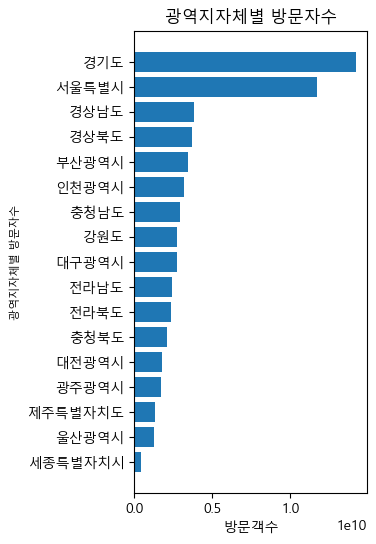

In [25]:
# Set the font name explicitly
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(3, 6))
plt.barh(광역지자체, 모든방문자수, height=0.8, align='center')
plt.title('광역지자체별 방문자수', fontsize=12)
plt.xlabel('방문객수', fontsize=10)
plt.ylabel('광역지자체별 방문자수', fontsize=8)
plt.show()

In [26]:
df2_all

,광역지자체명_x,기초지자체명,광역지자체 방문자 수_x,광역지자체 방문자 비율_x,기초지자체 방문자 수_x,기초지자체 방문자 비율_x,광역지자체명_y,광역지자체 방문자 수_y,광역지자체 방문자 비율_y,기초지자체 방문자 수_y,기초지자체 방문자 비율_y,모든 기초지자체 방문자수,모든 광역지자체 방문자수
0,강원도,춘천시,3.015669e+09,3.6,487171589.0,16.2,강원도,663061904.0,4.4,67737016.0,10.2,554908605.0,3.678731e+09
1,강원도,원주시,3.015669e+09,3.6,528889778.0,17.5,강원도,663061904.0,4.4,64842802.0,9.8,593732580.0,3.678731e+09
2,강원도,강릉시,3.015669e+09,3.6,447200533.0,14.8,강원도,663061904.0,4.4,89910443.0,13.6,537110976.0,3.678731e+09
3,강원도,동해시,3.015669e+09,3.6,162347163.0,5.4,강원도,663061904.0,4.4,22539777.0,3.4,184886940.0,3.678731e+09
4,강원도,태백시,3.015669e+09,3.6,86282413.0,2.9,강원도,663061904.0,4.4,10470467.0,1.6,96752880.0,3.678731e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,충청북도,증평군,2.595677e+09,3.1,69344337.0,2.7,충청북도,493745299.0,3.3,10611528.0,2.1,79955865.0,3.089422e+09
354,충청북도,진천군,2.595677e+09,3.1,132093867.0,5.1,충청북도,493745299.0,3.3,29039646.0,5.9,161133513.0,3.089422e+09
355,충청북도,괴산군,2.595677e+09,3.1,73701030.0,2.8,충청북도,493745299.0,3.3,24247000.0,4.9,97948030.0,3.089422e+09
356,충청북도,음성군,2.595677e+09,3.1,179493504.0,6.9,충청북도,493745299.0,3.3,34678984.0,7.0,214172488.0,3.089422e+09


In [27]:
광역지자체명 = df2_all['광역지자체명_x'].unique().tolist()
광역지자체명

['강원도',
 '경상남도',
 '경기도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '울산광역시',
 '인천광역시',
 '서울특별시',
 '세종특별자치시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

In [28]:
df2_KT

,광역지자체명,기초지자체명,광역지자체 방문자 수,광역지자체 방문자 비율,기초지자체 방문자 수,기초지자체 방문자 비율
0,강원도,춘천시,3.015669e+09,3.6,487171589.0,16.2
1,강원도,원주시,3.015669e+09,3.6,528889778.0,17.5
2,강원도,강릉시,3.015669e+09,3.6,447200533.0,14.8
3,강원도,동해시,3.015669e+09,3.6,162347163.0,5.4
4,강원도,태백시,3.015669e+09,3.6,86282413.0,2.9
...,...,...,...,...,...,...
245,충청북도,증평군,2.595677e+09,3.1,69344337.0,2.7
246,충청북도,진천군,2.595677e+09,3.1,132093867.0,5.1
247,충청북도,괴산군,2.595677e+09,3.1,73701030.0,2.8
248,충청북도,음성군,2.595677e+09,3.1,179493504.0,6.9


In [29]:
df2_SKT.head()

,광역지자체명,기초지자체명,광역지자체 방문자 수,광역지자체 방문자 비율,기초지자체 방문자 수,기초지자체 방문자 비율
0,강원도,고성군,663061904.0,4.4,39699436.0,6.0
1,강원도,춘천시,663061904.0,4.4,67737016.0,10.2
2,강원도,원주시,663061904.0,4.4,64842802.0,9.8
3,강원도,강릉시,663061904.0,4.4,89910443.0,13.6
4,강원도,동해시,663061904.0,4.4,22539777.0,3.4


In [30]:
df2_KT['광역지자체 방문자 수'].unique() 

array([3.01566917e+09, 2.04985264e+10, 4.93776884e+09, 4.13182959e+09,
       2.33581593e+09, 3.95511954e+09, 2.42080169e+09, 5.53944412e+09,
       1.86426858e+10, 4.05530202e+08, 1.69742207e+09, 3.98366570e+09,
       2.81013942e+09, 2.82198383e+09, 1.43038208e+09, 3.36079522e+09,
       2.59567716e+09])

In [31]:
df2_KT

,광역지자체명,기초지자체명,광역지자체 방문자 수,광역지자체 방문자 비율,기초지자체 방문자 수,기초지자체 방문자 비율
0,강원도,춘천시,3.015669e+09,3.6,487171589.0,16.2
1,강원도,원주시,3.015669e+09,3.6,528889778.0,17.5
2,강원도,강릉시,3.015669e+09,3.6,447200533.0,14.8
3,강원도,동해시,3.015669e+09,3.6,162347163.0,5.4
4,강원도,태백시,3.015669e+09,3.6,86282413.0,2.9
...,...,...,...,...,...,...
245,충청북도,증평군,2.595677e+09,3.1,69344337.0,2.7
246,충청북도,진천군,2.595677e+09,3.1,132093867.0,5.1
247,충청북도,괴산군,2.595677e+09,3.1,73701030.0,2.8
248,충청북도,음성군,2.595677e+09,3.1,179493504.0,6.9


In [32]:
df2_SKT['광역지자체 방문자 수'].unique() 

array([6.63061904e+08, 3.33596920e+09, 8.70409475e+08, 7.87545652e+08,
       3.57526425e+08, 6.68741272e+08, 3.71399812e+08, 1.06664418e+09,
       3.34382272e+09, 6.33854790e+07, 2.77335647e+08, 7.57676093e+08,
       5.73266527e+08, 4.76554233e+08, 2.85880439e+08, 6.63270366e+08,
       4.93745299e+08])

In [33]:
df2_SKT['광역지자체명']

0       강원도
1       강원도
2       강원도
3       강원도
4       강원도
       ... 
245    충청북도
246    충청북도
247    충청북도
248    충청북도
249    충청북도
Name: 광역지자체명, Length: 250, dtype: object

In [34]:
광역지_arr = df2_KT['광역지자체 방문자 수'].unique() + df2_SKT['광역지자체 방문자 수'].unique() 
광역지방문자수 = 광역지_arr.tolist()
광역지방문자수

[3678731073.0,
 23834495548.0,
 5808178313.0,
 4919375239.0,
 2693342351.0,
 4623860812.0,
 2792201506.0,
 6606088298.0,
 21986508484.0,
 468915681.0,
 1974757714.0,
 4741341788.0,
 3383405947.0,
 3298538063.0,
 1716262519.0,
 4024065586.0,
 3089422460.0]

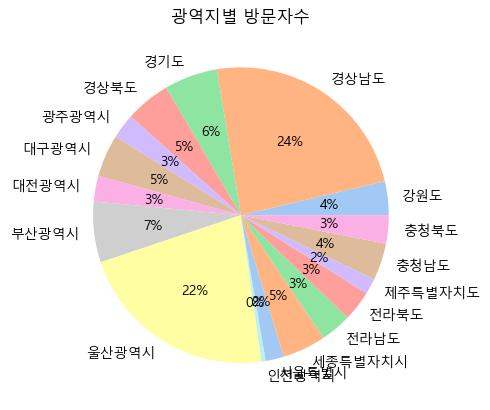

In [35]:
# #define data
# data = 광역지방문자수
# labels = 광역지자체명

# #https://lifewithdata.com/2022/03/07/how-to-create-a-pie-chart-in-matplotlib/
# # explode = [0, 0, 0.7, 0, 0.9, 0.8, 0.7, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# #define Seaborn color palette to use
# colors = sns.color_palette('pastel')[0:]

# #create pie chart
# plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%') #explode=explode
# plt.title("광역지별 방문자수")
# plt.show()

In [36]:
df2_all

,광역지자체명_x,기초지자체명,광역지자체 방문자 수_x,광역지자체 방문자 비율_x,기초지자체 방문자 수_x,기초지자체 방문자 비율_x,광역지자체명_y,광역지자체 방문자 수_y,광역지자체 방문자 비율_y,기초지자체 방문자 수_y,기초지자체 방문자 비율_y,모든 기초지자체 방문자수,모든 광역지자체 방문자수
0,강원도,춘천시,3.015669e+09,3.6,487171589.0,16.2,강원도,663061904.0,4.4,67737016.0,10.2,554908605.0,3.678731e+09
1,강원도,원주시,3.015669e+09,3.6,528889778.0,17.5,강원도,663061904.0,4.4,64842802.0,9.8,593732580.0,3.678731e+09
2,강원도,강릉시,3.015669e+09,3.6,447200533.0,14.8,강원도,663061904.0,4.4,89910443.0,13.6,537110976.0,3.678731e+09
3,강원도,동해시,3.015669e+09,3.6,162347163.0,5.4,강원도,663061904.0,4.4,22539777.0,3.4,184886940.0,3.678731e+09
4,강원도,태백시,3.015669e+09,3.6,86282413.0,2.9,강원도,663061904.0,4.4,10470467.0,1.6,96752880.0,3.678731e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,충청북도,증평군,2.595677e+09,3.1,69344337.0,2.7,충청북도,493745299.0,3.3,10611528.0,2.1,79955865.0,3.089422e+09
354,충청북도,진천군,2.595677e+09,3.1,132093867.0,5.1,충청북도,493745299.0,3.3,29039646.0,5.9,161133513.0,3.089422e+09
355,충청북도,괴산군,2.595677e+09,3.1,73701030.0,2.8,충청북도,493745299.0,3.3,24247000.0,4.9,97948030.0,3.089422e+09
356,충청북도,음성군,2.595677e+09,3.1,179493504.0,6.9,충청북도,493745299.0,3.3,34678984.0,7.0,214172488.0,3.089422e+09


In [37]:
df2_all_seoul = df2_all[(df2_all['광역지자체명_x'] == '서울특별시') & (df2_all['광역지자체명_y'] == '서울특별시')]
df2_all_seoul

,광역지자체명_x,기초지자체명,광역지자체 방문자 수_x,광역지자체 방문자 비율_x,기초지자체 방문자 수_x,기초지자체 방문자 비율_x,광역지자체명_y,광역지자체 방문자 수_y,광역지자체 방문자 비율_y,기초지자체 방문자 수_y,기초지자체 방문자 비율_y,모든 기초지자체 방문자수,모든 광역지자체 방문자수
223,서울특별시,중구,1.864269e+10,22.0,9.049302e+08,4.9,서울특별시,3.343823e+09,22.2,201235769.0,6.0,1.106166e+09,2.198651e+10
252,서울특별시,강서구,1.864269e+10,22.0,7.682885e+08,4.1,서울특별시,3.343823e+09,22.2,142680856.0,4.3,9.109694e+08,2.198651e+10
257,서울특별시,종로구,1.864269e+10,22.0,8.845861e+08,4.7,서울특별시,3.343823e+09,22.2,217735030.0,6.5,1.102321e+09,2.198651e+10
258,서울특별시,용산구,1.864269e+10,22.0,7.288318e+08,3.9,서울특별시,3.343823e+09,22.2,138045135.0,4.1,8.668770e+08,2.198651e+10
259,서울특별시,성동구,1.864269e+10,22.0,5.564457e+08,3.0,서울특별시,3.343823e+09,22.2,106844006.0,3.2,6.632897e+08,2.198651e+10
260,서울특별시,광진구,1.864269e+10,22.0,6.886543e+08,3.7,서울특별시,3.343823e+09,22.2,110539444.0,3.3,7.991938e+08,2.198651e+10
261,서울특별시,동대문구,1.864269e+10,22.0,5.704249e+08,3.1,서울특별시,3.343823e+09,22.2,91761928.0,2.7,6.621868e+08,2.198651e+10
262,서울특별시,중랑구,1.864269e+10,22.0,4.836634e+08,2.6,서울특별시,3.343823e+09,22.2,63658967.0,1.9,5.473224e+08,2.198651e+10
263,서울특별시,성북구,1.864269e+10,22.0,6.286009e+08,3.4,서울특별시,3.343823e+09,22.2,87427159.0,2.6,7.160280e+08,2.198651e+10
264,서울특별시,강북구,1.864269e+10,22.0,4.028052e+08,2.2,서울특별시,3.343823e+09,22.2,66641556.0,2.0,4.694468e+08,2.198651e+10


In [47]:
서울구 = df2_all_seoul['기초지자체명'].tolist()
서울구

['중구',
 '강서구',
 '종로구',
 '용산구',
 '성동구',
 '광진구',
 '동대문구',
 '중랑구',
 '성북구',
 '강북구',
 '도봉구',
 '노원구',
 '은평구',
 '서대문구',
 '마포구',
 '양천구',
 '구로구',
 '금천구',
 '영등포구',
 '동작구',
 '관악구',
 '서초구',
 '강남구',
 '송파구',
 '강동구']

In [46]:
구별방문자수 = df2_all_seoul['모든 기초지자체 방문자수'].tolist()
구별방문자수

[1106165977.0,
 910969377.0,
 1102321138.0,
 866876954.0,
 663289678.0,
 799193765.0,
 662186809.0,
 547322386.0,
 716028033.0,
 469446793.0,
 409237148.0,
 848910878.0,
 624879424.0,
 814435365.0,
 1196787573.0,
 574411944.0,
 715831930.0,
 364972483.0,
 1147366192.0,
 674399690.0,
 758101634.0,
 1530066088.0,
 2194531873.0,
 1481639153.0,
 807136202.0]

In [52]:
df_gu = pd.DataFrame({'서울구': 서울구, '구별방문자수': 구별방문자수})
df_gu

,서울구,구별방문자수
0,중구,1.106166e+09
1,강서구,9.109694e+08
2,종로구,1.102321e+09
3,용산구,8.668770e+08
4,성동구,6.632897e+08
5,광진구,7.991938e+08
6,동대문구,6.621868e+08
7,중랑구,5.473224e+08
8,성북구,7.160280e+08
9,강북구,4.694468e+08


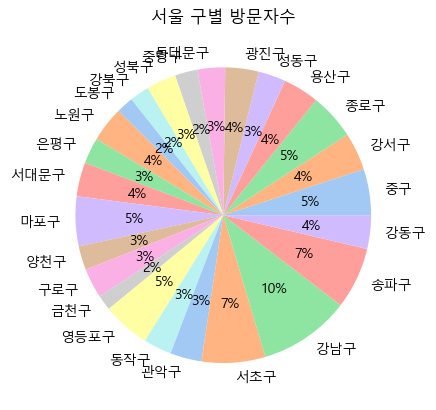

In [50]:
#define data
data = 구별방문자수
labels = 서울구

#https://lifewithdata.com/2022/03/07/how-to-create-a-pie-chart-in-matplotlib/
# explode = [0, 0, 0.7, 0, 0.9, 0.8, 0.7, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%') #explode=explode
plt.title("서울 구별 방문자수")
plt.show()

In [56]:
df_gu = df_gu.sort_values('구별방문자수', ascending=True)
df_gu

,서울구,구별방문자수
17,금천구,3.649725e+08
10,도봉구,4.092371e+08
9,강북구,4.694468e+08
7,중랑구,5.473224e+08
15,양천구,5.744119e+08
12,은평구,6.248794e+08
6,동대문구,6.621868e+08
4,성동구,6.632897e+08
19,동작구,6.743997e+08
16,구로구,7.158319e+08


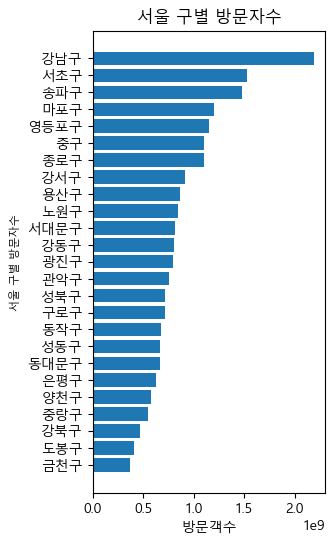

In [58]:
plt.figure(figsize=(3, 6))
plt.barh(df_gu['서울구'], df_gu['구별방문자수'], height=0.8, align='center')
plt.title('서울 구별 방문자수', fontsize=12)
plt.xlabel('방문객수', fontsize=10)
plt.ylabel('서울 구별 방문자수', fontsize=8)
plt.show()

In [39]:
df_time.head(10)

,월별 방한 외래관광객 (1975-2022),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"Visitor Arrivals by Month, 1975-2022",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,연 도,계,성장률,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
4,Year,Total(명),Change(%),Jan.,Feb.,Mar.,Apr.,May,Jun.,Jul.,Aug.,Sep.,Oct.,Nov.,Dec.
5,1975,632846,22.3,35494,37979,48733,50090,54741,56824,54439,60901,62188,68959,61335,41163
6,1976,834239,31.823382,53132,54190,67721,72636,75719,70727,69515,78207,77460,90774,74705,49453
7,1977,949666,13.836203,63052,66138,78442,88615,83151,78977,72650,85528,89828,99762,84919,58604
8,1978,1079396,13.660592,71812,74218,88620,93260,97457,93537,84141,95242,103099,115515,95860,66635
9,1979,1126100,4.326864,81236,81422,94674,103420,107847,102237,92006,106788,108925,106092,78319,63134


In [40]:
years = df_time.iloc[5:,0].tolist()
years

[1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [41]:
visitors = df_time.iloc[5:,1].tolist()
visitors

[632846,
 834239,
 949666,
 1079396,
 1126100,
 976415,
 1093214,
 1145044,
 1194551,
 1297318,
 1426045,
 1659972,
 1874501,
 2340462,
 2728054,
 2958839,
 3196340,
 3231081,
 3331226,
 3580024,
 3753197,
 3683779,
 3908140,
 4250216,
 4659785,
 5321792,
 5147204,
 5347468,
 4752762,
 5818138,
 6022752,
 6155046,
 6448240,
 6890841,
 7817533,
 8797658,
 9794796,
 11140028,
 12175550,
 14201516,
 13231651,
 17241823,
 13335758,
 15346879,
 17502756,
 2519118,
 967003,
 3198017]

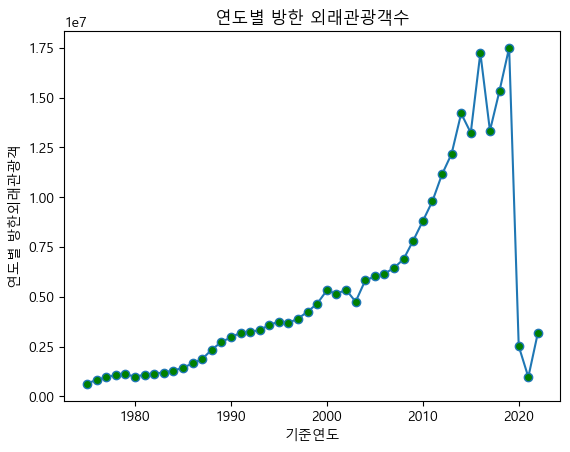

In [42]:
xpoints = years
ypoints = visitors

plt.xlabel("기준연도")
plt.ylabel("연도별 방한외래관광객")
plt.plot(xpoints ,ypoints, marker = 'o', markerfacecolor='green')
plt.title("연도별 방한 외래관광객수")
plt.show()